### we want too predict whether the rockets of Space_x will land successfully or not
* if the class is Zero it means it will fail otherwise it will successfully land (class =1)

In [252]:
import os
os.getcwd()

'C:\\Users\\ASUS\\gits-update\\Space_X-_rockets'

In [253]:
import pandas as pd
import numpy as np

In [254]:
df=pd.read_csv('dataset_falcon9.csv')

In [255]:
df

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,86,2020-09-03,Falcon 9,15400.000000,VLEO,KSC LC 39A,True ASDS,2,True,True,True,5e9e3032383ecb6bb234e7ca,5.0,2,B1060,-80.603956,28.608058,1
86,87,2020-10-06,Falcon 9,15400.000000,VLEO,KSC LC 39A,True ASDS,3,True,True,True,5e9e3032383ecb6bb234e7ca,5.0,2,B1058,-80.603956,28.608058,1
87,88,2020-10-18,Falcon 9,15400.000000,VLEO,KSC LC 39A,True ASDS,6,True,True,True,5e9e3032383ecb6bb234e7ca,5.0,5,B1051,-80.603956,28.608058,1
88,89,2020-10-24,Falcon 9,15400.000000,VLEO,CCAFS SLC 40,True ASDS,3,True,True,True,5e9e3033383ecbb9e534e7cc,5.0,2,B1060,-80.577366,28.561857,1


as previuos command (df) does not provide a good vision. we will use the (.info) method

In [256]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   FlightNumber    90 non-null     int64  
 1   Date            90 non-null     object 
 2   BoosterVersion  90 non-null     object 
 3   PayloadMass     90 non-null     float64
 4   Orbit           90 non-null     object 
 5   LaunchSite      90 non-null     object 
 6   Outcome         90 non-null     object 
 7   Flights         90 non-null     int64  
 8   GridFins        90 non-null     bool   
 9   Reused          90 non-null     bool   
 10  Legs            90 non-null     bool   
 11  LandingPad      64 non-null     object 
 12  Block           90 non-null     float64
 13  ReusedCount     90 non-null     int64  
 14  Serial          90 non-null     object 
 15  Longitude       90 non-null     float64
 16  Latitude        90 non-null     float64
 17  Class           90 non-null     int64

* so as a result we have 90 rows (0 to 89) 
* and 18 columns 
* 90 non-Null  means all of the data are available (no missing values)
* except the column LandingPad that has 64 non_nul. so we have (90-64=26) null values.

In [257]:
# let seethe first 5 rows
df.head()

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


In [258]:
# or we can see the tail of our data_set
df.tail(3)

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
87,88,2020-10-18,Falcon 9,15400.0,VLEO,KSC LC 39A,True ASDS,6,True,True,True,5e9e3032383ecb6bb234e7ca,5.0,5,B1051,-80.603956,28.608058,1
88,89,2020-10-24,Falcon 9,15400.0,VLEO,CCAFS SLC 40,True ASDS,3,True,True,True,5e9e3033383ecbb9e534e7cc,5.0,2,B1060,-80.577366,28.561857,1
89,90,2020-11-05,Falcon 9,3681.0,MEO,CCAFS SLC 40,True ASDS,1,True,False,True,5e9e3032383ecb6bb234e7ca,5.0,0,B1062,-80.577366,28.561857,1


In [259]:
# if we want to see only one column of our data_set:
df['FlightNumber']

0      1
1      2
2      3
3      4
4      5
      ..
85    86
86    87
87    88
88    89
89    90
Name: FlightNumber, Length: 90, dtype: int64

In [260]:
#if a typical row deletion is required (for column deletion --> index=1)
df.drop(2, axis=0)
# as a result we can see the second row does not exist


,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0
5,6,2014-01-06,Falcon 9,3325.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1005,-80.577366,28.561857,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,86,2020-09-03,Falcon 9,15400.000000,VLEO,KSC LC 39A,True ASDS,2,True,True,True,5e9e3032383ecb6bb234e7ca,5.0,2,B1060,-80.603956,28.608058,1
86,87,2020-10-06,Falcon 9,15400.000000,VLEO,KSC LC 39A,True ASDS,3,True,True,True,5e9e3032383ecb6bb234e7ca,5.0,2,B1058,-80.603956,28.608058,1
87,88,2020-10-18,Falcon 9,15400.000000,VLEO,KSC LC 39A,True ASDS,6,True,True,True,5e9e3032383ecb6bb234e7ca,5.0,5,B1051,-80.603956,28.608058,1
88,89,2020-10-24,Falcon 9,15400.000000,VLEO,CCAFS SLC 40,True ASDS,3,True,True,True,5e9e3033383ecbb9e534e7cc,5.0,2,B1060,-80.577366,28.561857,1


In [261]:
#df.drop(2, axis=1) -- > this will lead to an error
df.drop('Date', axis=1)

# note that it is a temporary drop
# to make a permanent drop we should use ('Date', axis=1, replace=True)


,FlightNumber,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,86,Falcon 9,15400.000000,VLEO,KSC LC 39A,True ASDS,2,True,True,True,5e9e3032383ecb6bb234e7ca,5.0,2,B1060,-80.603956,28.608058,1
86,87,Falcon 9,15400.000000,VLEO,KSC LC 39A,True ASDS,3,True,True,True,5e9e3032383ecb6bb234e7ca,5.0,2,B1058,-80.603956,28.608058,1
87,88,Falcon 9,15400.000000,VLEO,KSC LC 39A,True ASDS,6,True,True,True,5e9e3032383ecb6bb234e7ca,5.0,5,B1051,-80.603956,28.608058,1
88,89,Falcon 9,15400.000000,VLEO,CCAFS SLC 40,True ASDS,3,True,True,True,5e9e3033383ecbb9e534e7cc,5.0,2,B1060,-80.577366,28.561857,1


In [262]:
#to see the columns names
df.columns

Index(['FlightNumber', 'Date', 'BoosterVersion', 'PayloadMass', 'Orbit',
       'LaunchSite', 'Outcome', 'Flights', 'GridFins', 'Reused', 'Legs',
       'LandingPad', 'Block', 'ReusedCount', 'Serial', 'Longitude', 'Latitude',
       'Class'],
      dtype='object')

In [263]:
# another way of visualizing the shape of the data set is the (.shape) attribute.
df.shape

(90, 18)

difference between method and attribute:
* methods are here to do something like (info or drop ) and they have peranteces
* attributes give us a data or information.like (shape or columns ) . they do not use () .

### add a row to a dataFrame
* to add a data frame we need a dictionary. which the keys are the name of the columns and the values are the values

In [264]:
new_row= {'FlightNumber':11, 'Date':2, 'BoosterVersion':3, 'PayloadMass':4, 'Orbit':5,
       'LaunchSite':6, 'Outcome':7, 'Flights':8, 'GridFins':9, 'Reused':10, 'Legs':11,
       'LandingPad':12, 'Block':13, 'ReusedCount':14, 'Serial':15, 'Longitude':16, 'Latitude':17,
       'Class':18}

# df2=pd.apend(new_row , ignore_index=True) # we should replace (append) with ( concat)
df2 = pd.DataFrame(new_row, index=[0])
df2=pd.concat([df ,df2], ignore_index=True)


In [265]:
# to see the results
df2.tail()

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
86,87,2020-10-06,Falcon 9,15400.0,VLEO,KSC LC 39A,True ASDS,3,1,1,1,5e9e3032383ecb6bb234e7ca,5.0,2,B1058,-80.603956,28.608058,1
87,88,2020-10-18,Falcon 9,15400.0,VLEO,KSC LC 39A,True ASDS,6,1,1,1,5e9e3032383ecb6bb234e7ca,5.0,5,B1051,-80.603956,28.608058,1
88,89,2020-10-24,Falcon 9,15400.0,VLEO,CCAFS SLC 40,True ASDS,3,1,1,1,5e9e3033383ecbb9e534e7cc,5.0,2,B1060,-80.577366,28.561857,1
89,90,2020-11-05,Falcon 9,3681.0,MEO,CCAFS SLC 40,True ASDS,1,1,0,1,5e9e3032383ecb6bb234e7ca,5.0,0,B1062,-80.577366,28.561857,1
90,11,2,3,4.0,5,6,7,8,9,10,11,12,13.0,14,15,16.000000,17.000000,18


In [266]:
# looking only at column of BoosterVersion
df['BoosterVersion']

0     Falcon 9
1     Falcon 9
2     Falcon 9
3     Falcon 9
4     Falcon 9
        ...   
85    Falcon 9
86    Falcon 9
87    Falcon 9
88    Falcon 9
89    Falcon 9
Name: BoosterVersion, Length: 90, dtype: object

In [267]:
# but it is not enough. we want to see the diversity of the BoosterVersions.
# so we use (set) to detect the diversity
set(df['BoosterVersion'])

{'Falcon 9'}

In [268]:
# as a result we observe that the (Falcon 9) is the only BoosterVersion exist in the data set!!

In [269]:
# next column is the (PayloadMass). which is the mass the rocket carries with itself.
#so let see the min and the max of the PayloadMass.

min(df['PayloadMass']) # also df['PayloadMass'].min

350.0

In [270]:
max(df['PayloadMass'])

15600.0

In [271]:
#to see the average of the PayloadMass:

df['PayloadMass'].mean()

6104.959411764707

In [272]:
# and to see standardDeviation:

df['PayloadMass'].std()

4694.671719712728

####  why std is a good representative of the data scaterring?
* suppose two number( 5 and 25 ) 
the average is (30/2= 15)

* also for numbers (14 and 16 ) the average is (30/2=15)
but the reality is that the two number (5 ,25 ) are not the same as ( 14 , 16 ) in terms of deviation (scattering).

##### thats why its better to use std instead of average to measure the diversity (scattering) of the numeric data.
* the std for (5 , 25) is 10. 
* the std for (14 ,16) is 1




In [273]:
# the method (describe) will do alot for us. (min , max, std , ...)
# also we know that this method will act on numerical data 

df['PayloadMass'].describe()

count       90.000000
mean      6104.959412
std       4694.671720
min        350.000000
25%       2510.750000
50%       4701.500000
75%       8912.750000
max      15600.000000
Name: PayloadMass, dtype: float64

<Axes: >

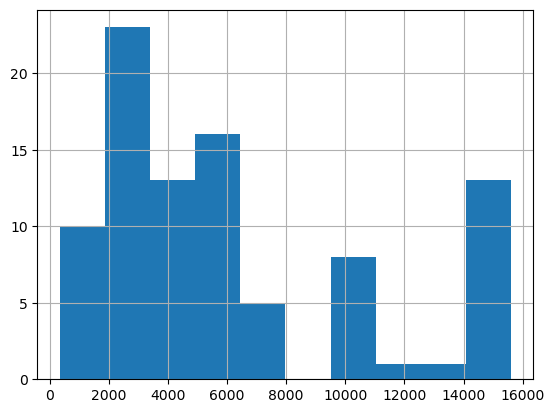

In [274]:
# to see the histogram of the payloadMass:
df['PayloadMass'].hist()

<Axes: >

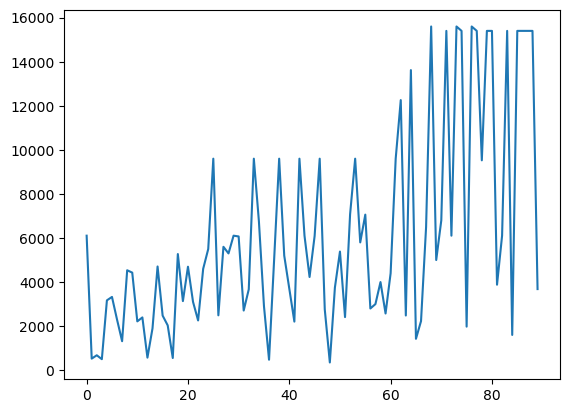

In [275]:
# or simply plot the the whole data
df['PayloadMass'].plot()

In [276]:
#next column is (Orbit)

# to find the unique values using (set) method

set(df['Orbit'])

{'ES-L1', 'GEO', 'GTO', 'HEO', 'ISS', 'LEO', 'MEO', 'PO', 'SO', 'SSO', 'VLEO'}

In [277]:
# to find the unique values using (Unique) method
df['Orbit'].unique()

array(['LEO', 'ISS', 'PO', 'GTO', 'ES-L1', 'SSO', 'HEO', 'MEO', 'VLEO',
       'SO', 'GEO'], dtype=object)

In [278]:
# count the values in each category using (.value_counts) method

df['Orbit'].value_counts()

Orbit
GTO      27
ISS      21
VLEO     14
PO        9
LEO       7
SSO       5
MEO       3
ES-L1     1
HEO       1
SO        1
GEO       1
Name: count, dtype: int64

<Axes: >

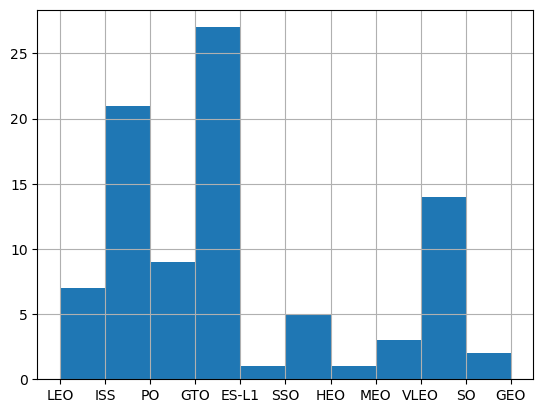

In [279]:
# visualize using hist method:

df['Orbit'].hist()

#### now lets make a dataFrame of successfull lands (class =1) 

In [280]:
# we define the Success_df as the dataFrame in which values of the column class equals to 1.
# at the other hand the Fail_df is the  DataFrame in which the values of the column class is 0.

Success_df=df[df['Class']==1]
Fail_df=df[df['Class']==0]

In [281]:
# lets check the new dataFrames with (info) method
Success_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 60 entries, 6 to 89
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   FlightNumber    60 non-null     int64  
 1   Date            60 non-null     object 
 2   BoosterVersion  60 non-null     object 
 3   PayloadMass     60 non-null     float64
 4   Orbit           60 non-null     object 
 5   LaunchSite      60 non-null     object 
 6   Outcome         60 non-null     object 
 7   Flights         60 non-null     int64  
 8   GridFins        60 non-null     bool   
 9   Reused          60 non-null     bool   
 10  Legs            60 non-null     bool   
 11  LandingPad      55 non-null     object 
 12  Block           60 non-null     float64
 13  ReusedCount     60 non-null     int64  
 14  Serial          60 non-null     object 
 15  Longitude       60 non-null     float64
 16  Latitude        60 non-null     float64
 17  Class           60 non-null     int64  
dt

In [282]:
Fail_df['Class'].head()

0    0
1    0
2    0
3    0
4    0
Name: Class, dtype: int64

In [283]:
df.columns


Index(['FlightNumber', 'Date', 'BoosterVersion', 'PayloadMass', 'Orbit',
       'LaunchSite', 'Outcome', 'Flights', 'GridFins', 'Reused', 'Legs',
       'LandingPad', 'Block', 'ReusedCount', 'Serial', 'Longitude', 'Latitude',
       'Class'],
      dtype='object')

In [284]:
len(df.columns)

18

In [285]:
# we can do same for the rest of the columns. 
#but here we take a quick look to the other columns:

print('LaunchSite:',set(df['LaunchSite']))
print('Outcome:',set(df['Outcome']))
print('Flights:',set(df['Flights']))


LaunchSite: {'VAFB SLC 4E', 'KSC LC 39A', 'CCAFS SLC 40'}
Outcome: {'True ASDS', 'True Ocean', 'None ASDS', 'True RTLS', 'False ASDS', 'None None', 'False Ocean', 'False RTLS'}
Flights: {1, 2, 3, 4, 5, 6}


In [286]:
# we can use a loop:
for i in range (len(df.columns)):
    
    print(df.columns[i] ,":")
    print(set(df[df.columns[i]]))
    print('---------')

    

FlightNumber :
{1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90}
---------
Date :
{'2019-08-06', '2013-09-29', '2018-01-31', '2020-05-30', '2020-08-18', '2019-05-04', '2018-03-30', '2015-12-22', '2018-09-10', '2017-08-24', '2020-06-30', '2020-01-19', '2018-05-11', '2019-12-05', '2015-04-27', '2015-02-11', '2018-08-07', '2018-04-18', '2012-05-22', '2020-03-18', '2020-10-24', '2014-09-07', '2020-10-18', '2017-10-11', '2017-02-19', '2018-07-25', '2014-09-21', '2020-03-07', '2016-05-27', '2017-07-05', '2017-12-15', '2014-04-18', '2018-11-15', '2018-03-06', '2017-09-07', '2017-01-14', '2020-06-13', '2013-03-01', '2019-05-24', '2015-06-28', '2020-09-03', '2017-05-15', '2017-10-30', '2014-07-14',

In [287]:
# to focus on the column (Outcome):

df['Outcome'].value_counts()

Outcome
True ASDS      41
None None      19
True RTLS      14
False ASDS      6
True Ocean      5
False Ocean     2
None ASDS       2
False RTLS      1
Name: count, dtype: int64

In [288]:
# let see the same focus on the Success_df and the Fail_df:
print('Success:\n ',Success_df['Outcome'].value_counts())
print('-----------')
print('Fail:\n ',Fail_df['Outcome'].value_counts())

Success:
  Outcome
True ASDS     41
True RTLS     14
True Ocean     5
Name: count, dtype: int64
-----------
Fail:
  Outcome
None None      19
False ASDS      6
False Ocean     2
None ASDS       2
False RTLS      1
Name: count, dtype: int64


In [289]:
# focus on  categorical values: (LandingPad) , (Block), (ReusedCount)
print('------------LandingPad:\n' , df['LandingPad'].value_counts())
print('------------Block:\n' , df['Block'].value_counts())
print('------------ReusedCount:\n' , df['ReusedCount'].value_counts())


------------LandingPad:
 LandingPad
5e9e3032383ecb6bb234e7ca    35
5e9e3032383ecb267a34e7c7    13
5e9e3033383ecbb9e534e7cc    12
5e9e3032383ecb761634e7cb     2
5e9e3032383ecb554034e7c9     2
Name: count, dtype: int64
------------Block:
 Block
5.0    39
1.0    19
3.0    15
4.0    11
2.0     6
Name: count, dtype: int64
------------ReusedCount:
 ReusedCount
0    30
1    24
3    12
5    11
2     9
4     4
Name: count, dtype: int64


In [290]:
# focus on  boolean values: (GridFins) , (Reused), (Legs)
print('------------GridFins:\n' , df['GridFins'].value_counts())
print('------------Reused:\n' , df['Reused'].value_counts())
print('------------Legs:\n' , df['Legs'].value_counts())


------------GridFins:
 GridFins
True     70
False    20
Name: count, dtype: int64
------------Reused:
 Reused
False    53
True     37
Name: count, dtype: int64
------------Legs:
 Legs
True     71
False    19
Name: count, dtype: int64


In [291]:
# focus on  boolean values: (Longitude) , (Latitude), (LaunchSite)
print('------------Longitude:\n' , df['Longitude'].value_counts())
print('------------Latitude:\n' , df['Latitude'].value_counts())
print('------------LaunchSite:\n' , df['LaunchSite'].value_counts())

------------Longitude:
 Longitude
-80.577366     55
-80.603956     22
-120.610829    13
Name: count, dtype: int64
------------Latitude:
 Latitude
28.561857    55
28.608058    22
34.632093    13
Name: count, dtype: int64
------------LaunchSite:
 LaunchSite
CCAFS SLC 40    55
KSC LC 39A      22
VAFB SLC 4E     13
Name: count, dtype: int64


In [292]:
# as the 3 above mentioned columns have the same meaning, we can ommit 2 of them

# in addition, we can also drop the column(Boosterversion) since it has only one value and therefore effectless.
# and also the column (serial) can be dropped:

df=df.drop(['BoosterVersion','Serial','Longitude','Latitude'], axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   FlightNumber  90 non-null     int64  
 1   Date          90 non-null     object 
 2   PayloadMass   90 non-null     float64
 3   Orbit         90 non-null     object 
 4   LaunchSite    90 non-null     object 
 5   Outcome       90 non-null     object 
 6   Flights       90 non-null     int64  
 7   GridFins      90 non-null     bool   
 8   Reused        90 non-null     bool   
 9   Legs          90 non-null     bool   
 10  LandingPad    64 non-null     object 
 11  Block         90 non-null     float64
 12  ReusedCount   90 non-null     int64  
 13  Class         90 non-null     int64  
dtypes: bool(3), float64(2), int64(4), object(5)
memory usage: 8.1+ KB


In [293]:
# the number of columns changed from 18 to 14

### Visualization
* MatplotLib and SeaBorn are the two famous library for data Visualization

In [294]:
#first we install the required libraries, if not already installed
# !pip install matplotlib
# !pip install seaborn

#and for have the result at the same window(only in jupyter notebook):
#%matplotlib inline

In [295]:
import seaborn as sns
import matplotlib.pyplot as plt

C:\Users\ASUS\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


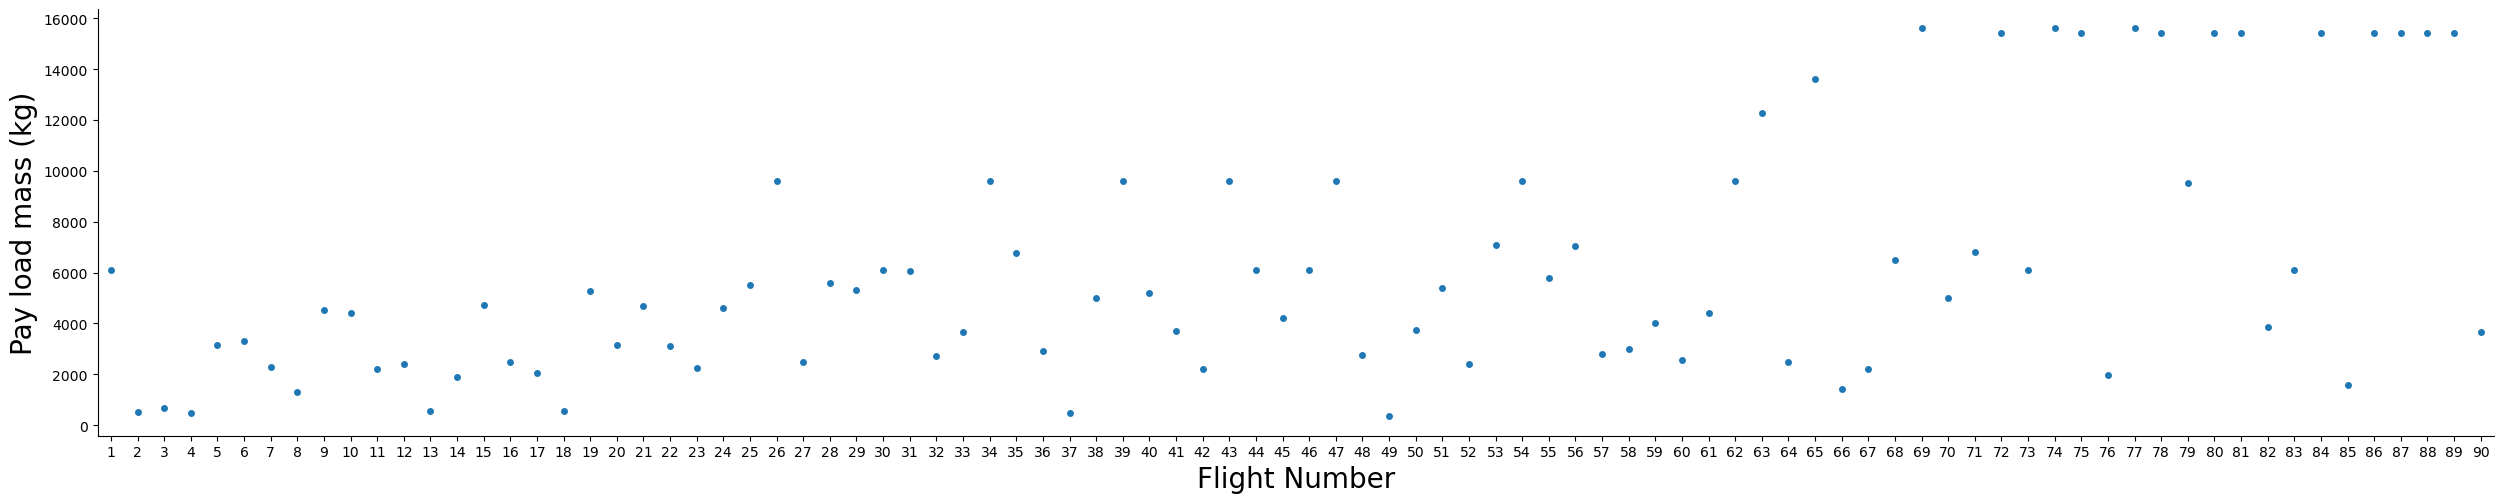

In [296]:
# to visualize the relation between PayloadMass and FlightNumber:

sns.catplot(y="PayloadMass" , x="FlightNumber" , data= df , aspect=5)

#uncomment to see the hue effect:
# sns.catplot(y="PayloadMass" , x="FlightNumber" ,hue="Class", data= df , aspect=5)

plt.xlabel("Flight Number" , fontsize=20)
plt.ylabel("Pay load mass (kg)" , fontsize =20)
plt.show()

C:\Users\ASUS\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


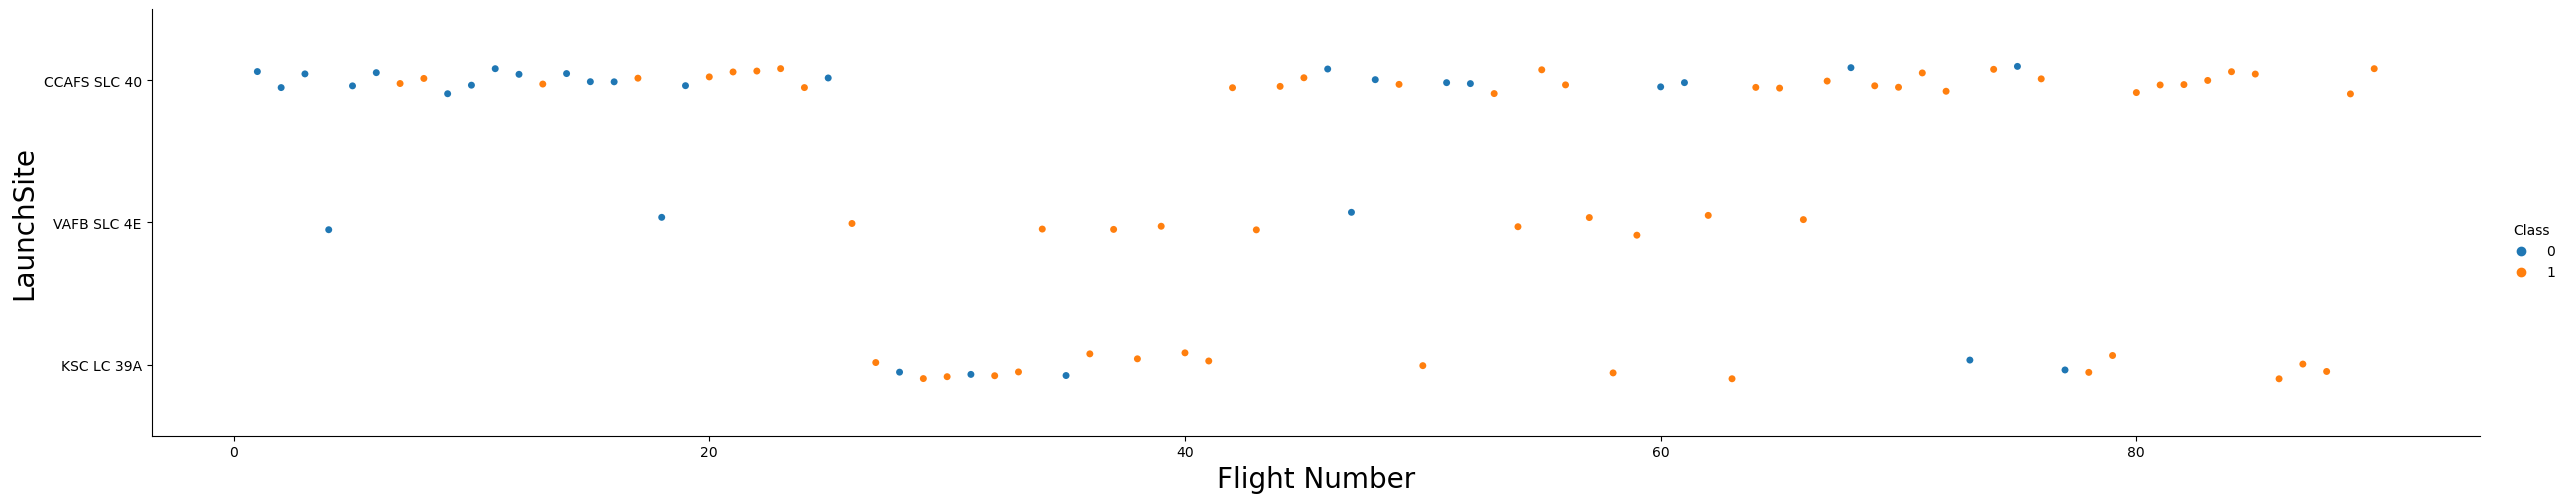

In [297]:
# to visualize the relation between LaunchSite and FlightNumber:


#uncomment to see the hue effect:
sns.catplot(y="LaunchSite" , x="FlightNumber" ,hue="Class", data= df , aspect=5)
# sns.catplot(y="LaunchSite" , x="FlightNumber" , data= df , aspect=5)

plt.xlabel("Flight Number" , fontsize=20)
plt.ylabel("LaunchSite" , fontsize =20)
plt.show()

C:\Users\ASUS\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


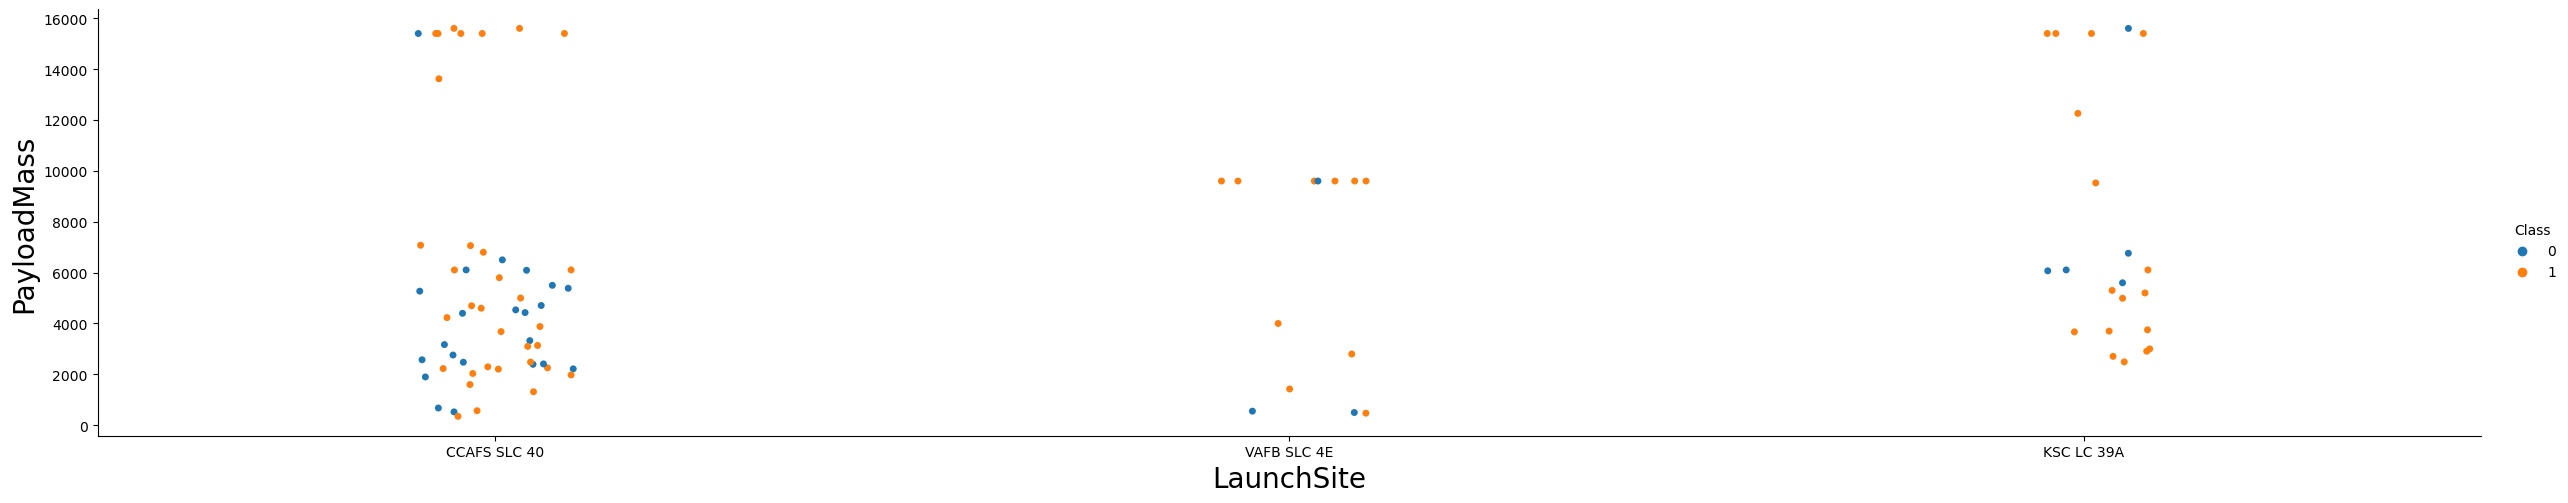

In [298]:
# to visualize the relation between LaunchSite and PayloadMass:


#uncomment to see the hue effect:
sns.catplot(x="LaunchSite" , y="PayloadMass" ,hue="Class", data= df , aspect=5)
# sns.catplot(y="LaunchSite" , x="PayloadMass" , data= df , aspect=5)

plt.xlabel("LaunchSite" , fontsize =20)
plt.ylabel("PayloadMass" , fontsize=20)

plt.show()

In [299]:
#depend on our goal, we can visualise relation between each desired paires 

C:\Users\ASUS\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


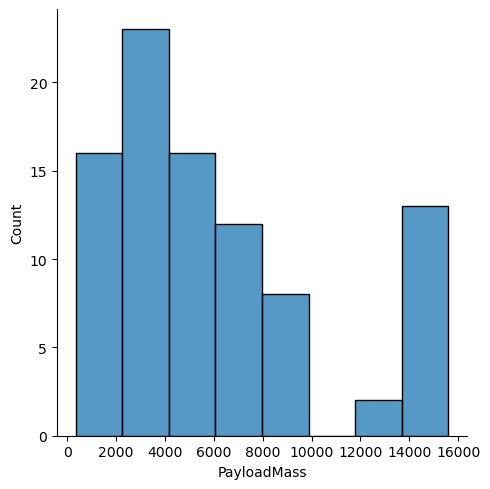

In [300]:
#to visualize the number of flight proportional to Payload (for numerical data)
sns.displot(df['PayloadMass'])

<Axes: xlabel='LaunchSite', ylabel='count'>

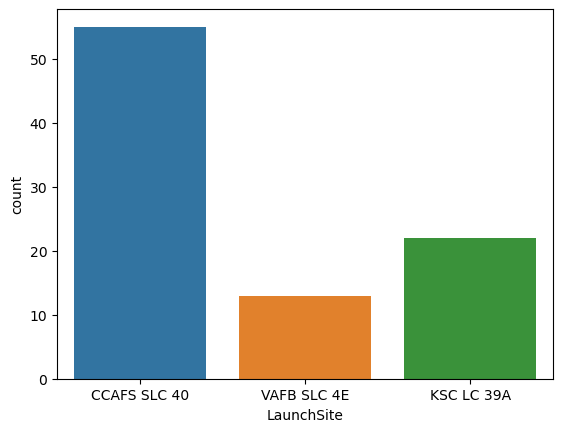

In [301]:
# using (countplot) to have bar chart of the (categorical data)
sns.countplot(x="LaunchSite",data=df)

#### Note
* we use (sns.countplot) for categorical data
* and use (sns.displot) for numerical data

In [302]:
df.columns

Index(['FlightNumber', 'Date', 'PayloadMass', 'Orbit', 'LaunchSite', 'Outcome',
       'Flights', 'GridFins', 'Reused', 'Legs', 'LandingPad', 'Block',
       'ReusedCount', 'Class'],
      dtype='object')

### Data Preprocessing session

In [303]:
# to train a ML model we need to convert all the categorical to Numerical Data
# in this session we are going to see how to manage the missing values

In [304]:
df_missing=pd.read_excel('missing_dataset_falcon9.xlsx')
df_missing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   FlightNumber    90 non-null     int64         
 1   Date            90 non-null     datetime64[ns]
 2   BoosterVersion  90 non-null     object        
 3   PayloadMass     81 non-null     float64       
 4   Orbit           90 non-null     object        
 5   LaunchSite      86 non-null     object        
 6   Outcome         90 non-null     object        
 7   Flights         90 non-null     int64         
 8   GridFins        90 non-null     bool          
 9   Reused          90 non-null     bool          
 10  Legs            90 non-null     bool          
 11  LandingPad      64 non-null     object        
 12  Block           90 non-null     int64         
 13  ReusedCount     90 non-null     int64         
 14  Serial          90 non-null     object        
 15  Longitud

In [305]:
# we can see that we have some missing values
# the first method is to drop the rows which consist missing values
df_row=df_missing.dropna(axis=0)
df_row.info()

<class 'pandas.core.frame.DataFrame'>
Index: 58 entries, 13 to 89
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   FlightNumber    58 non-null     int64         
 1   Date            58 non-null     datetime64[ns]
 2   BoosterVersion  58 non-null     object        
 3   PayloadMass     58 non-null     float64       
 4   Orbit           58 non-null     object        
 5   LaunchSite      58 non-null     object        
 6   Outcome         58 non-null     object        
 7   Flights         58 non-null     int64         
 8   GridFins        58 non-null     bool          
 9   Reused          58 non-null     bool          
 10  Legs            58 non-null     bool          
 11  LandingPad      58 non-null     object        
 12  Block           58 non-null     int64         
 13  ReusedCount     58 non-null     int64         
 14  Serial          58 non-null     object        
 15  Longitude   

In [306]:
# as it is obvious great percentage of the data will be lost by this method.

In [307]:
# the second method is to delet the columns with missing values:
df_col=df_missing.dropna(axis=1)
df_col.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   FlightNumber    90 non-null     int64         
 1   Date            90 non-null     datetime64[ns]
 2   BoosterVersion  90 non-null     object        
 3   Orbit           90 non-null     object        
 4   Outcome         90 non-null     object        
 5   Flights         90 non-null     int64         
 6   GridFins        90 non-null     bool          
 7   Reused          90 non-null     bool          
 8   Legs            90 non-null     bool          
 9   Block           90 non-null     int64         
 10  ReusedCount     90 non-null     int64         
 11  Serial          90 non-null     object        
 12  Longitude       90 non-null     float64       
 13  Latitude        90 non-null     float64       
 14  Class           90 non-null     int64         
dtypes: bool(

In [308]:
# so the number of columns from 18 reduced to 15. 
# now it is upto us to decide whether it is a good method or no


In [309]:
#other method is to replace the NAN values, with the average value of related column:
#lets focus on the column (PayloadMass)
# let see the average value of it
payLoadMean=df_missing['PayloadMass'].mean()
payLoadMean

6379.7368845315905

In [310]:
df_missing['PayloadMass']

0      6104.959412
1       525.000000
2       677.000000
3              NaN
4      3170.000000
          ...     
85    15400.000000
86    15400.000000
87    15400.000000
88    15400.000000
89     3681.000000
Name: PayloadMass, Length: 90, dtype: float64

In [311]:
#note:
#the 1th arguman is the (going) and the 2th argoman is the (comming) one
df_missing['PayloadMass']=df_missing['PayloadMass'].replace(np.nan,payLoadMean)
df_missing['PayloadMass']

0      6104.959412
1       525.000000
2       677.000000
3      6379.736885
4      3170.000000
          ...     
85    15400.000000
86    15400.000000
87    15400.000000
88    15400.000000
89     3681.000000
Name: PayloadMass, Length: 90, dtype: float64

In [312]:
#lets go to the column (LaunchSite) which is a categorical data:

df_missing['LaunchSite'].value_counts()


LaunchSite
CCAFS SLC 40    53
KSC LC 39A      20
VAFB SLC 4E     13
Name: count, dtype: int64

In [313]:
df_missing['LaunchSite']

0     CCAFS SLC 40
1     CCAFS SLC 40
2     CCAFS SLC 40
3      VAFB SLC 4E
4              NaN
          ...     
85      KSC LC 39A
86      KSC LC 39A
87      KSC LC 39A
88    CCAFS SLC 40
89    CCAFS SLC 40
Name: LaunchSite, Length: 90, dtype: object

In [314]:
#so it is logical to replace to replace the missing value with the most repeated value:

df_missing['LaunchSite']=df_missing['LaunchSite'].replace(np.nan,'CCAFS SLC 40')
df_missing['LaunchSite']

0     CCAFS SLC 40
1     CCAFS SLC 40
2     CCAFS SLC 40
3      VAFB SLC 4E
4     CCAFS SLC 40
          ...     
85      KSC LC 39A
86      KSC LC 39A
87      KSC LC 39A
88    CCAFS SLC 40
89    CCAFS SLC 40
Name: LaunchSite, Length: 90, dtype: object

In [315]:
df_missing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   FlightNumber    90 non-null     int64         
 1   Date            90 non-null     datetime64[ns]
 2   BoosterVersion  90 non-null     object        
 3   PayloadMass     90 non-null     float64       
 4   Orbit           90 non-null     object        
 5   LaunchSite      90 non-null     object        
 6   Outcome         90 non-null     object        
 7   Flights         90 non-null     int64         
 8   GridFins        90 non-null     bool          
 9   Reused          90 non-null     bool          
 10  Legs            90 non-null     bool          
 11  LandingPad      64 non-null     object        
 12  Block           90 non-null     int64         
 13  ReusedCount     90 non-null     int64         
 14  Serial          90 non-null     object        
 15  Longitud

In [316]:
#we can see that the  column(LaunchSite) is consist of 90 rows. it means no missing value exist.

In [317]:
# now, lets go through the (LandingPad) column with any of the following commands:

# df_missing['LandingPad']
# df_missing['LandingPad'].info()
# df_missing['LandingPad'].describe()
df_missing['LandingPad'].value_counts()

LandingPad
5e9e3032383ecb6bb234e7ca    35
5e9e3032383ecb267a34e7c7    13
5e9e3033383ecbb9e534e7cc    12
5e9e3032383ecb761634e7cb     2
5e9e3032383ecb554034e7c9     2
Name: count, dtype: int64

In [318]:
# it seems that the missing values in (LandingPad) column should replace with('5e9e3032383ecb6bb234e7ca') which is the
# most repeated. but it is not correct:
df_landigad=df_missing[df_missing['LandingPad']=='5e9e3032383ecb6bb234e7ca']
set(df_landigad['Orbit'])

{'GTO', 'HEO', 'ISS', 'MEO', 'VLEO'}

In [319]:
df_missing[['LandingPad', 'Orbit']]

,LandingPad,Orbit
0,NaN,LEO
1,NaN,LEO
2,NaN,ISS
3,NaN,PO
4,NaN,GTO
...,...,...
85,5e9e3032383ecb6bb234e7ca,VLEO
86,5e9e3032383ecb6bb234e7ca,VLEO
87,5e9e3032383ecb6bb234e7ca,VLEO
88,5e9e3033383ecbb9e534e7cc,VLEO


In [320]:
# we should notice that the correct desition for replacing, highly depends on the domain Knowledge

##### the end of missing value discussion

In [321]:
# lets  go back to the main dataFrame;

#Definition:
#Dummy Variable: is a variable used for labeling the categorical variables

#for example for the following categorical data we can use dummy variables:

In [322]:
df['LaunchSite']

0     CCAFS SLC 40
1     CCAFS SLC 40
2     CCAFS SLC 40
3      VAFB SLC 4E
4     CCAFS SLC 40
          ...     
85      KSC LC 39A
86      KSC LC 39A
87      KSC LC 39A
88    CCAFS SLC 40
89    CCAFS SLC 40
Name: LaunchSite, Length: 90, dtype: object

In [323]:
dummy_1=pd.get_dummies(df['LaunchSite'])
dummy_1

,CCAFS SLC 40,KSC LC 39A,VAFB SLC 4E
0,True,False,False
1,True,False,False
2,True,False,False
3,False,False,True
4,True,False,False
...,...,...,...
85,False,True,False
86,False,True,False
87,False,True,False
88,True,False,False


In [324]:
# as a result, the previous single column (LaunchSite) has been converted to 3 columns

In [325]:
# we can do the same for the column(LandingPad)
dummy_2=pd.get_dummies(df['LandingPad'])
dummy_2[10:20]

,5e9e3032383ecb267a34e7c7,5e9e3032383ecb554034e7c9,5e9e3032383ecb6bb234e7ca,5e9e3032383ecb761634e7cb,5e9e3033383ecbb9e534e7cc
10,False,False,False,False,False
11,False,False,False,True,False
12,False,False,False,False,False
13,False,False,False,True,False
14,False,False,False,False,False
15,False,False,True,False,False
16,True,False,False,False,False
17,False,False,False,False,True
18,False,False,True,False,False
19,False,False,True,False,False


In [326]:
#we can also do it at once. it means, convert all the categorical to numerical by a single line command:
# df_dummy= pd.get_dummies(df[['Orbit' ,'LaunchSite','Outcome','LandingPad','Serial']])
df_dummy= pd.get_dummies(df[['Orbit' ,'LaunchSite','Outcome','LandingPad']])
df_dummy

,Orbit_ES-L1,Orbit_GEO,Orbit_GTO,Orbit_HEO,Orbit_ISS,Orbit_LEO,Orbit_MEO,Orbit_PO,Orbit_SO,Orbit_SSO,...,Outcome_None ASDS,Outcome_None None,Outcome_True ASDS,Outcome_True Ocean,Outcome_True RTLS,LandingPad_5e9e3032383ecb267a34e7c7,LandingPad_5e9e3032383ecb554034e7c9,LandingPad_5e9e3032383ecb6bb234e7ca,LandingPad_5e9e3032383ecb761634e7cb,LandingPad_5e9e3033383ecbb9e534e7cc
0,False,False,False,False,False,True,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
1,False,False,False,False,False,True,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
2,False,False,False,False,True,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,True,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,False,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,True,False,False
86,False,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,True,False,False
87,False,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,True,False,False
88,False,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,True


In [327]:
#next step is to convert the types to desired ones:
df['GridFins']=df['GridFins'].astype(int)
df['Reused']=df['Reused'].astype(int)
df['Legs']=df['Legs'].astype(int)

In [328]:
# next step is to drop the categorical columns and replace them with the dummy variables (df_dummy)
df=df.drop(['Orbit' ,'LaunchSite','Outcome','LandingPad','Date'],axis=1)


In [329]:
df=pd.concat([df,df_dummy],axis=1)

In [330]:
df.head()

,FlightNumber,PayloadMass,Flights,GridFins,Reused,Legs,Block,ReusedCount,Class,Orbit_ES-L1,...,Outcome_None ASDS,Outcome_None None,Outcome_True ASDS,Outcome_True Ocean,Outcome_True RTLS,LandingPad_5e9e3032383ecb267a34e7c7,LandingPad_5e9e3032383ecb554034e7c9,LandingPad_5e9e3032383ecb6bb234e7ca,LandingPad_5e9e3032383ecb761634e7cb,LandingPad_5e9e3033383ecbb9e534e7cc
0,1,6104.959412,1,0,0,0,1.0,0,0,False,...,False,True,False,False,False,False,False,False,False,False
1,2,525.000000,1,0,0,0,1.0,0,0,False,...,False,True,False,False,False,False,False,False,False,False
2,3,677.000000,1,0,0,0,1.0,0,0,False,...,False,True,False,False,False,False,False,False,False,False
3,4,500.000000,1,0,0,0,1.0,0,0,False,...,False,False,False,False,False,False,False,False,False,False
4,5,3170.000000,1,0,0,0,1.0,0,0,False,...,False,True,False,False,False,False,False,False,False,False


In [331]:
# df.info()
# now we have a preprocessed DataFrame
# so we can save it for further use of the data frame in next sessions.

#### Read
* pd.read_csv()
* pd.read_json()
* pd.read_excel()
* pd.read_sql()

#### write
* pd.to_csv()
* pd.to_json()
* pd.to_excel()
* pd.to_sql()

In [333]:
df.to_csv('preprocessed_dataset.csv')

In [334]:
# df.columns
# end of session

#### logistic Regression

* till now we have a clean DataSet
* now lets go to ML.
* we have 3 types of ML

* Supervised learning
* unsupervised Learning
* Reinforcement learning

#### 2 major types of ML:
* Classification
    * Logistic regression
    * Decision tree
    * Random Forest
    * K Nearest Neighbor
* Regression
    * Linear Regression

In [335]:
# now first lets read the preprocessed Data Set
df=pd.read_csv('preprocessed_dataset.csv')
df.head()

,Unnamed: 0,FlightNumber,PayloadMass,Flights,GridFins,Reused,Legs,Block,ReusedCount,Class,...,Outcome_None ASDS,Outcome_None None,Outcome_True ASDS,Outcome_True Ocean,Outcome_True RTLS,LandingPad_5e9e3032383ecb267a34e7c7,LandingPad_5e9e3032383ecb554034e7c9,LandingPad_5e9e3032383ecb6bb234e7ca,LandingPad_5e9e3032383ecb761634e7cb,LandingPad_5e9e3033383ecbb9e534e7cc
0,0,1,6104.959412,1,0,0,0,1.0,0,0,...,False,True,False,False,False,False,False,False,False,False
1,1,2,525.000000,1,0,0,0,1.0,0,0,...,False,True,False,False,False,False,False,False,False,False
2,2,3,677.000000,1,0,0,0,1.0,0,0,...,False,True,False,False,False,False,False,False,False,False
3,3,4,500.000000,1,0,0,0,1.0,0,0,...,False,False,False,False,False,False,False,False,False,False
4,4,5,3170.000000,1,0,0,0,1.0,0,0,...,False,True,False,False,False,False,False,False,False,False


In [336]:
# to make sure that our data is clean
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 37 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Unnamed: 0                           90 non-null     int64  
 1   FlightNumber                         90 non-null     int64  
 2   PayloadMass                          90 non-null     float64
 3   Flights                              90 non-null     int64  
 4   GridFins                             90 non-null     int64  
 5   Reused                               90 non-null     int64  
 6   Legs                                 90 non-null     int64  
 7   Block                                90 non-null     float64
 8   ReusedCount                          90 non-null     int64  
 9   Class                                90 non-null     int64  
 10  Orbit_ES-L1                          90 non-null     bool   
 11  Orbit_GEO                         

In [337]:
# another method to make sure that no missing data exist.
df.isnull().sum()

Unnamed: 0                             0
FlightNumber                           0
PayloadMass                            0
Flights                                0
GridFins                               0
Reused                                 0
Legs                                   0
Block                                  0
ReusedCount                            0
Class                                  0
Orbit_ES-L1                            0
Orbit_GEO                              0
Orbit_GTO                              0
Orbit_HEO                              0
Orbit_ISS                              0
Orbit_LEO                              0
Orbit_MEO                              0
Orbit_PO                               0
Orbit_SO                               0
Orbit_SSO                              0
Orbit_VLEO                             0
LaunchSite_CCAFS SLC 40                0
LaunchSite_KSC LC 39A                  0
LaunchSite_VAFB SLC 4E                 0
Outcome_False AS

In [338]:
# so our data is ready to be trained with a ML model
X=df.drop('Class', axis=1)
y=df['Class']

In [339]:
# pip install sklearn
from sklearn.model_selection import train_test_split
X_train , X_test ,y_train , y_test = train_test_split(X , y,
                                                     test_size=0.20,
                                                     random_state=101)

In [340]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()
logmodel.fit(X_train , y_train)

C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [341]:
prediction = logmodel.predict(X_test)

In [343]:
prediction

array([0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1], dtype=int64)

In [359]:
# lets evaluate the model by looking at the y_test:
pd.Series(y_test).to_frame().T


,50,6,51,54,53,69,32,31,21,88,43,47,3,1,74,16,45,25
Class,0,1,0,1,1,1,1,1,1,1,1,0,0,0,0,1,0,1


######  Evaluation (TP, FP, TN, FN)
* if output is 0 or 1 --> we consider negative or positive proportionaly

* TP: the model has truely predicted positive
* FP: the model has Flasly predicted positive
* TN: the model has truely predicted negative
* FN: the model has Flasly predicted negative

In [360]:
# but we can not always assess visualy
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,prediction)

array([[ 7,  0],
       [ 1, 10]], dtype=int64)

In [362]:
# 7 --> TP
# 0 --> FP
# 0 --> FN
# 10 -->TN
# note : the bigger the numbers on the main diameter, the better our model is

In [363]:
#calculate the number of true predictions using sklearn library
from sklearn.metrics import accuracy_score
accuracy_score(y_test , prediction, normalize=False)

17

In [366]:
# accuracy in percentage term
accuracy_score(y_test,prediction, normalize=True)

0.9444444444444444

In [367]:
# end of session 6